# Principal Component Analysis
## Mathematical Background

[ 11.51471607  15.50890546  10.87175558  15.54560093  15.23238013
  25.02531902  13.84094787  17.99109359  15.50997884   9.35590864
  13.91393781  18.48851179   8.80483287  10.37263292  15.58886562
  22.0221429   13.29683796  10.11344014  23.07906836  18.9698852 ]
15.2523380849


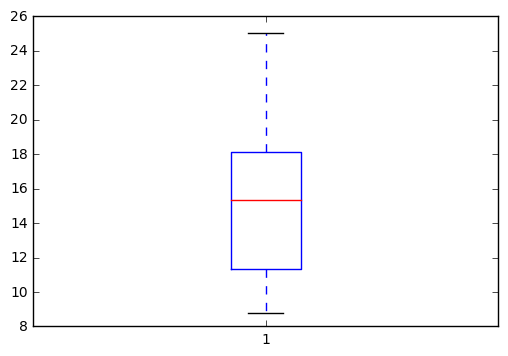

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#Mean
mu, sigma = 15, 3.5 # mean and standard deviation
x = np.random.normal(mu, sigma, 20)
print(x)
mean = np.sum(x) / len(x)
print(mean)
plt.boxplot(x)
plt.show()

### Is mean sufficient to describe the data? No! Look at these two data sets...

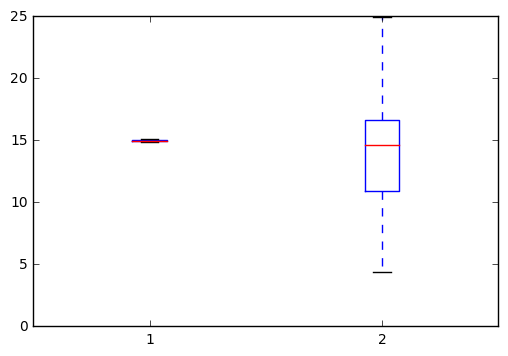

In [14]:
x1 = np.random.normal(15, 0.1, 20)
x2 = np.random.normal(15, 5, 20)
data = [x1,x2]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)
plt.show()

### The difference here is the variance or spread of the data points around the mean. The standard deviation (sd) is a measure of how spread out the data points are.

In [15]:
s1 = np.std(x1)
s2 = np.std(x2)
print(s1," vs. ", s2)

0.0780774328127  vs.  5.40532681656


### Another important measure for the spread of the data is variance, which is just the standard deviation squared.

In [16]:
print("s^2: ", s1**2, " is equal to ", np.var(x1))

s^2:  0.00609608551462  is equal to  0.00609608551462


### Covariance: A measure of spread of data between two variables

In [17]:
x3 = x2 * 0.5
print(x3)
Covariance = np.cov(x2,x3, bias=True)[0][1]
print(Covariance)

[  9.31989382   7.60506429  12.49222617  10.57948979   7.50846846
   7.41455435   8.29558254   3.21658128   7.38979876   5.01130469
   7.26700883   2.19865424   8.38950044   2.30378381  10.35779246
   3.15580125   5.59459402   7.12364283   5.62946518   6.67135193]
14.6087789969


In [18]:
x4 = np.random.normal(25, 0.1, 20)
Covariance = np.cov(x2,x4, bias=True)[0][1]
print(Covariance)

-0.104766904644


### A high value of covariance signals a high correlation between the two variables/features. 
### However, what is high? The standardized covariance, called correlation, standardizes the values in the interval [-1,1] with values close to -1 or 1 indication a high correlation.

In [19]:
correlation = np.corrcoef(x2,x4)[0][1]
print (correlation, " -> this low (absolut) value means that both variables are independent (not correlated at all).")
correlation2 = np.corrcoef(x2,x3)[0][1]
print(correlation2, " -> this high (absolut) value means that both variables are actually the same (entirely correlated)! So, one can be remove without losing any information.")

-0.223533433837  -> this low (absolut) value means that both variables are independent (not correlated at all).
1.0  -> this high (absolut) value means that both variables are actually the same (entirely correlated)! So, one can be remove without losing any information.


In [20]:
#let is look how the covariance matrix of three dimensions look like
print(np.cov([x2,x3,x4]))

[[  3.07553242e+01   1.53776621e+01  -1.10280952e-01]
 [  1.53776621e+01   7.68883105e+00  -5.51404761e-02]
 [ -1.10280952e-01  -5.51404761e-02   7.91399418e-03]]


In [21]:
#For completion, here is the correlation matrix
print(np.corrcoef([x2,x3,x4]))

[[ 1.          1.         -0.22353343]
 [ 1.          1.         -0.22353343]
 [-0.22353343 -0.22353343  1.        ]]


## Example from lecture slides

mean x:  1.81  mean y:  1.91


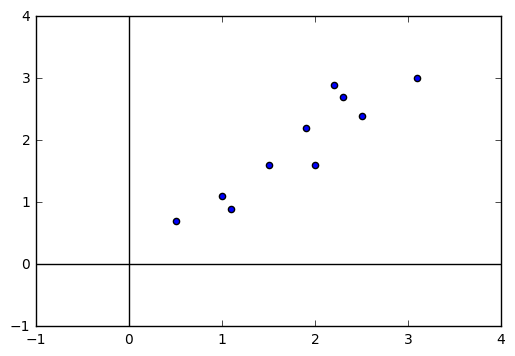

In [22]:
x_data_slides= [2.5, 0.5,2.2, 1.9, 3.1, 2.3, 2,  1,  1.5, 1.1]
y_data_slides= [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
mean_x = np.mean(x_data_slides)
mean_y = np.mean(y_data_slides)
print("mean x: ", mean_x, " mean y: ", mean_y)
plt.scatter(x_data_slides,y_data_slides)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
[ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]


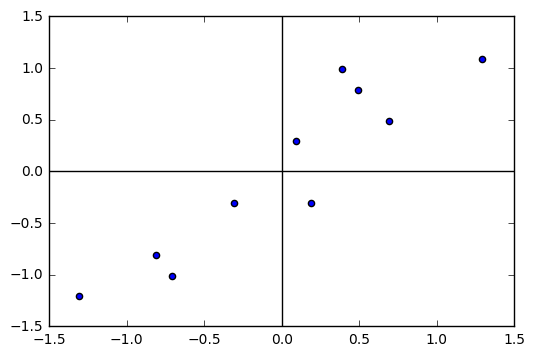

[[ 0.61655556  0.61544444]
 [ 0.61544444  0.71655556]]


In [23]:
x_standardized = x_data_slides-mean_x
y_standardized = y_data_slides-mean_y
print(x_standardized)
print(y_standardized)
plt.scatter(x_standardized,y_standardized)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()
Covariance_slides = np.cov(x_standardized,y_standardized, bias=False)

print(Covariance_slides)

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(Covariance_slides)
print("eigenvalues: ",eigenvalues , " and \neigenvectors: ", eigenvectors)

eigenvalues:  [ 0.0490834   1.28402771]  and 
eigenvectors:  [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


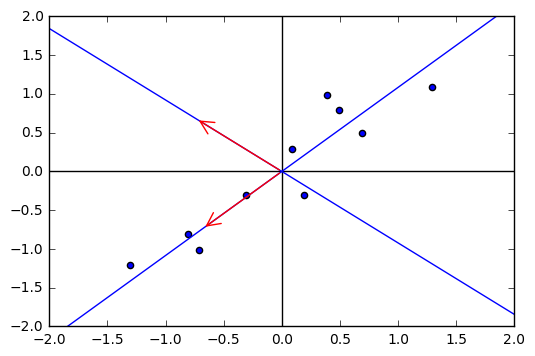

In [25]:
#plot eigenvectors
from matplotlib.lines import Line2D
plt.figure()
ax = plt.gca()
#ax.quiver([0,0], [0,0], eigen_result[1].T[0], eigen_result[1].T[1], angles='xy', scale_units='xy', scale=1, color="red")
plt.scatter(x_standardized,y_standardized)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
first=eigenvectors.T[0]
snd=eigenvectors.T[1]
l2 = Line2D([-3*first[0],3*first[0]],[-3*first[1],3*first[1]]) 
ax.add_line(l2)
l1 = Line2D([-3*snd[0],3*snd[0]],[-3*snd[1],3*snd[1]]) 
ax.add_line(l1)
l1.axes.annotate('',
        xytext=(0.0, 0.0),
        xy=(snd[0], snd[1]),
        arrowprops=dict(arrowstyle="->", color="red"),
        size=24)
l2.axes.annotate('',
        xytext=(0.0, 0.0),
        xy=(first[0], first[1]),
        arrowprops=dict(arrowstyle="->", color="red"),
        size=24)
plt.draw()
plt.show()

In [26]:
#if the dot product of two vectors is 0, then both are orthogonal / perpendicular / in a right angle
np.dot(first,snd)

0.0

## Build the feature vector and transform the original data to reduce the dimensionality

In [27]:
#full feature vector without reducing dimensions
featureVector_full= np.column_stack((eigenvectors.T[1].tolist(), eigenvectors.T[0].tolist())) #indexes switched due to sorting from highest (1) to lowest (0)
print(featureVector_full)
#reduced feature vector with only one dimension corresponding to the heighest eigenvalue
featureVector_reduced=eigenvectors.T[1]
print(featureVector_reduced)



[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
[-0.6778734  -0.73517866]


[[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
   0.09910944  1.14457216  0.43804614  1.22382056]
 [-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
  -0.3498247   0.04641726  0.01776463 -0.16267529]]


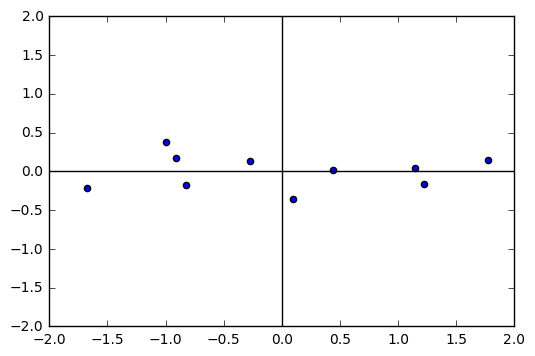

In [28]:
t_full = np.dot(featureVector_full.T,(x_standardized.T,y_standardized.T))
print(t_full)
plt.scatter(t_full[0],t_full[1])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]


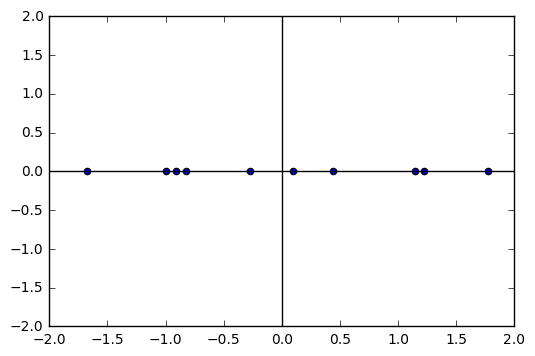

In [29]:
t_part = np.dot(featureVector_reduced,(x_standardized.T,y_standardized.T))
print(t_part)
plt.scatter(t_part,[0] * len(t_part))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## Get the original data back with lower dimensions

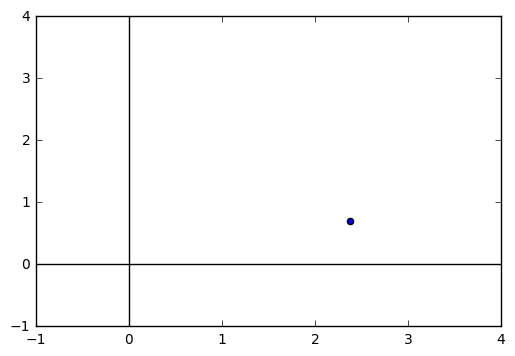

In [34]:
#original = (RowFeatureVector.T * FinalData) + Mean
temp = np.dot(featureVector_full.T,[t_part,[0] * len(t_part)])

original_transformed = temp
plt.scatter(original_transformed[0]+ mean_x,original_transformed[1]+ mean_y)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

## Complex Example: Community Rating

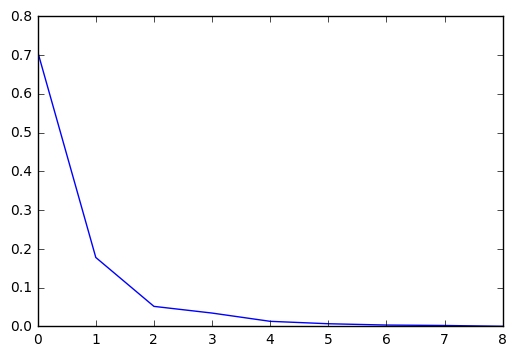

[[ -1.02986989e-02  -3.28619297e-01  -1.77575751e-01  -3.37382616e-02
   -1.73567542e-01  -4.55269588e-02  -9.03154123e-01  -8.05621952e-02
   -6.96838844e-02]
 [  2.69852729e-02   8.32425787e-01  -2.52013975e-02   2.33345863e-02
    1.61896456e-01   9.88378602e-02  -3.72317916e-01   1.21831989e-01
    3.40171194e-01]
 [ -3.18952096e-04  -3.65606633e-01   2.99097392e-02   8.60365464e-02
    8.47128304e-01   1.43273691e-01  -8.10885508e-02   1.20572031e-01
    3.14273967e-01]
 [ -6.13013697e-03  -2.33165111e-01  -1.93614099e-02   8.67912103e-02
   -4.29913490e-01   9.07078913e-02   9.90590327e-02  -1.86284969e-02
    8.57015537e-01]
 [ -8.91968192e-03   7.69704855e-02   1.77059227e-01  -1.09693523e-01
    1.25942426e-01   1.36075354e-01  -9.52464758e-03  -9.54937646e-01
    6.51054608e-02]
 [  3.17086702e-02  -5.97983236e-02   8.61144445e-01  -3.20711999e-02
   -1.33980276e-01   4.08592144e-01  -1.52618766e-01   1.94726431e-01
   -8.19223972e-02]
 [  1.31510824e-01  -9.46577619e-03  -4.

In [311]:
from sklearn.decomposition import PCA 
places = np.loadtxt("places.txt")
places=np.delete(places,len(places[0])-1,1) # removing last column, which was just the id
for i in range(len(places[0])):
    places[i] = np.log10(places[i])
places -= np.mean(places, axis=0)
pca = PCA(n_components=9)
pca.fit(places)
plt.plot(pca.explained_variance_ratio_)
plt.show()
print(pca.components_)

In [312]:
X = places
n_samples = X.shape[0]
# We center the data and compute the sample covariance matrix.
X -= np.mean(X, axis=0)
cov_matrix = np.dot(X.T, X) / n_samples
#Should be the same
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
#as this
eigenvalues = pca.explained_variance_
print(eigenvalues)

25387657.6096
6371555.03672
1854501.42062
1236347.21896
472785.65386
249628.107579
128391.399698
89692.1145578
11823.6100037
[  2.53876576e+07   6.37155504e+06   1.85450142e+06   1.23634722e+06
   4.72785654e+05   2.49628108e+05   1.28391400e+05   8.96921146e+04
   1.18236100e+04]


In [307]:
import pandas as pd #for nicer formatting
df = pd.DataFrame(X, columns=["Climate and Terrain","Housing","Health Care & Environment","Crime","Transportation","Education","The Arts","Recreation","Economics"])
pd.DataFrame(pca.components_.T, columns=['PC-1', 'PC-2','PC-3'], index=df.columns)


PC-1      PC-2      PC-3
Climate and Terrain       -0.010299  0.026985 -0.000319
Housing                   -0.328619  0.832426 -0.365607
Health Care & Environment -0.177576 -0.025201  0.029910
Crime                     -0.033738  0.023335  0.086037
Transportation            -0.173568  0.161896  0.847128
Education                 -0.045527  0.098838  0.143274
The Arts                  -0.903154 -0.372318 -0.081089
Recreation                -0.080562  0.121832  0.120572
Economics                 -0.069684  0.340171  0.314274